In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import kneed
import itertools
import csv
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AffinityPropagation
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import silhouette_visualizer
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings
pd.options.display.max_rows = 4000
init_notebook_mode(connected=True)
warnings.filterwarnings(action='ignore')

In [ ]:
os.getcwd()
cd /Users/gabyherediabaek/marketing_campaign/mkt_campaign/Data

In [5]:
data= pd.read_csv('marketing_campaign.csv', sep='\t')

In [6]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [8]:
data.drop('ID', axis=1, inplace=True)

In [9]:
# CONSTANT VARIABLES
data['Z_Revenue'].describe()
data['Z_CostContact'].describe()
data.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

count    2240.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: Z_Revenue, dtype: float64

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [10]:
data.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [11]:
data.Income.isnull().sum()

24

In [12]:
data.loc[data['Income'].isnull()== True]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,0,2,7,0,0,0,0,0,0,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,0,0,1,0,0,0,0,0,0,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,...,3,4,2,0,0,0,0,0,0,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,...,1,4,6,0,0,0,0,0,0,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,...,0,3,6,0,0,0,0,0,0,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,...,0,3,8,0,0,0,0,0,0,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,...,2,8,9,0,0,0,0,0,0,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,...,0,2,7,0,0,0,0,0,0,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,...,4,8,1,0,0,0,0,0,0,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,...,1,7,6,0,0,0,0,0,0,0


In [13]:
# Replacing missing values of 'Income' with mean value of the respective group of education:
for i in range(0, data.shape[0]):
    if data.Income[i]!=data.Income[i]: # NaN!=Nan
        data.Income[i]=data['Income'].loc[data['Education']==data['Education'][i]].mean()

In [14]:
data.isnull().any()

Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [15]:
import resource
# Get memory usage information (in bytes)
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Convert memory usage to megabytes (MB)
mem_usage_mb = mem_usage / (1024 ** 2)

print("Memory usage:", mem_usage_mb, "MB")

Memory usage: 217.171875 MB


In [16]:
import gensim.downloader as api
# from gensim.models.word2vec import Word2Vec

from multiprocessing import cpu_count
num_cpus = cpu_count()
print("Number of CPUs:", num_cpus)

if 'dataset' in locals() or 'dataset' in globals():
    pass
else:
    dataset = None
    
if dataset is not None:
    print("Dataset exists and was loaded successfully.")
else:
    dataset = api.load("word2vec-google-news-300") if dataset is None else dataset


Number of CPUs: 8


In [17]:
# Get memory usage information (in bytes)
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
# Convert memory usage to megabytes (MB)
mem_usage_mb = mem_usage / (1024 ** 2)
print("Memory usage:", mem_usage_mb, "MB")

Memory usage: 4231.984375 MB


In [18]:
type(dataset['Widow'])
dataset['Graduation'][0:10]

numpy.ndarray

array([-0.28710938, -0.00427246, -0.20898438,  0.07226562,  0.09082031,
       -0.40234375,  0.18359375,  0.12597656,  0.09814453,  0.234375  ],
      dtype=float32)

In [19]:
    data['Dt_Customer'].min()
    data['Dt_Customer']= pd.to_datetime(arg=data['Dt_Customer'], infer_datetime_format= True)
    #Checking transformation:
    # data.dtypes
    # Creating an empty column to receive the transformed values of 'Dt_Customer':
    data['Dt_Customer_rel']= np.nan
    # For each client, attribute the value of 'Dt_Customer_rel' as the difference in days in relation to the oldest date of registration:
    for i in range(0, data.shape[0]):
        data['Dt_Customer_rel'][i]= abs(data['Dt_Customer'][i]-(data['Dt_Customer'].min()))

    pd.DataFrame(data['Dt_Customer_rel']).head()
    data['Dt_Customer_rel']= (data['Dt_Customer_rel']/np.timedelta64(1, 'D')).astype(int)
    #Checking:
    data['Dt_Customer_rel'].head()
    #Dropping the original date column of the dataset:
    data.drop('Dt_Customer', axis=1, inplace=True)

#     data['Dt_Customer_rel']= scaler.fit_transform(data['Dt_Customer_rel'].values.reshape(-1,1))
    # #Checking:
    data['Dt_Customer_rel'].head()
    

'01-01-2013'

,Dt_Customer_rel
0,92 days 00:00:00
1,938 days 00:00:00
2,591 days 00:00:00
3,998 days 00:00:00
4,742 days 00:00:00


0     92
1    938
2    591
3    998
4    742
Name: Dt_Customer_rel, dtype: int64

0     92
1    938
2    591
3    998
4    742
Name: Dt_Customer_rel, dtype: int64

In [20]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_rel
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,0,1,92
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,938
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,591
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,998
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,742


In [21]:
clean_data = data.copy()
# clean_data.head()

Iteration 1
EMBEDDED MARITAL STATUS DONE
Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       ...
       'Marital_Status_290', 'Marital_Status_291', 'Marital_Status_292',
       'Marital_Status_293', 'Marital_Status_294', 'Marital_Status_295',
       'Marital_Status_296', 'Marital_Status_297', 'Marital_Status_298',
       'Marital_Status_299'],
      dtype='object', length=325)
EMBEDDED EDUCATION DONE
Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       ...
       'Education_290', 'Education_291', 'Education_292', 'Education_293',
       'Education_294', 'Education_295', 'Education_296', 'Education_297',
       'Education_298', 'Education_299'],
      dtype='object', length=624)


array([0.39534001, 0.19437815, 0.16295679])

Varianza explicada en los tres primeros componentes: 0.75
Con 11 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 48407.90
Coeficiente de silueta promedio: 48.3%
CH Score: 1480


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=4, random_state=2))

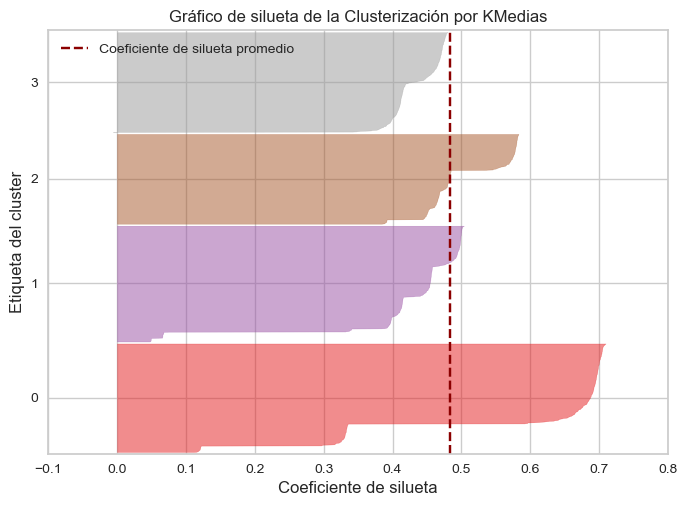

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.41 y el índice CH es 1453
Para 3 clusters, el coeficiente de silueta medio es 0.5 y el índice CH es 1592
Para 4 clusters, el coeficiente de silueta medio es 0.48 y el índice CH es 1480
Para 5 clusters, el coeficiente de silueta medio es 0.57 y el índice CH es 1508
Para 6 clusters, el coeficiente de silueta medio es 0.58 y el índice CH es 1520
Para 7 clusters, el coeficiente de silueta medio es 0.59 y el índice CH es 1516
Para 8 clusters, el coeficiente de silueta medio es 0.64 y el índice CH es 1672
Para 9 clusters, el coeficiente de silueta medio es 0.69 y el índice CH es 1837
Para 10 clusters, el coeficiente de silueta medio es 0.73 y el índice CH es 2135
Silhouette: 0.638599973112834:.2 / Clusters: 8
Coeficiente de silueta promedio: 0.64
CH Score: 1672
Iteration 1 : Word2Vec, Word2Vec

Iteration 2
EMBEDDED MARITAL STATUS DONE
Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFrui

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       ...
       'Marital_Status_290', 'Marital_Status_291', 'Marital_Status_292',
       'Marital_Status_293', 'Marital_Status_294', 'Marital_Status_295',
       'Marital_Status_296', 'Marital_Status_297', 'Marital_Status_298',
       'Marital_Status_299'],
      dtype='object', length=325)

array([0.42504098, 0.32050577, 0.13878868])

Varianza explicada en los tres primeros componentes: 0.88
Con 16 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 7128.60
Coeficiente de silueta promedio: 76.8%
CH Score: 5068


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=4, random_state=2))

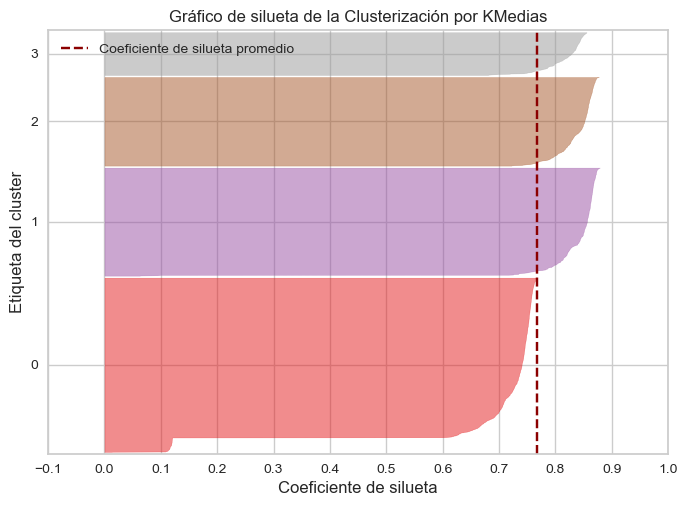

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.48 y el índice CH es 1368
Para 3 clusters, el coeficiente de silueta medio es 0.69 y el índice CH es 2991
Para 4 clusters, el coeficiente de silueta medio es 0.77 y el índice CH es 5068
Para 5 clusters, el coeficiente de silueta medio es 0.82 y el índice CH es 12109
Para 6 clusters, el coeficiente de silueta medio es 0.6 y el índice CH es 10341
Para 7 clusters, el coeficiente de silueta medio es 0.59 y el índice CH es 9819
Para 8 clusters, el coeficiente de silueta medio es 0.48 y el índice CH es 8891
Para 9 clusters, el coeficiente de silueta medio es 0.32 y el índice CH es 8210
Para 10 clusters, el coeficiente de silueta medio es 0.31 y el índice CH es 7642
Silhouette: 0.8236124179305544:.2 / Clusters: 5
Coeficiente de silueta promedio: 0.82
CH Score: 12109
Iteration 2 : Word2Vec, Ordinal

Iteration 3
EMBEDDED MARITAL STATUS DONE
Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntF

Index(['Year_Birth', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Income', 'Kidhome', 'Teenhome',
       'Recency',
       ...
       'Marital_Status_290', 'Marital_Status_291', 'Marital_Status_292',
       'Marital_Status_293', 'Marital_Status_294', 'Marital_Status_295',
       'Marital_Status_296', 'Marital_Status_297', 'Marital_Status_298',
       'Marital_Status_299'],
      dtype='object', length=329)

array([0.41571872, 0.31348051, 0.13574506])

Varianza explicada en los tres primeros componentes: 0.86
Con 18 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 7926.59
Coeficiente de silueta promedio: 73.5%
CH Score: 4596


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=4, random_state=2))

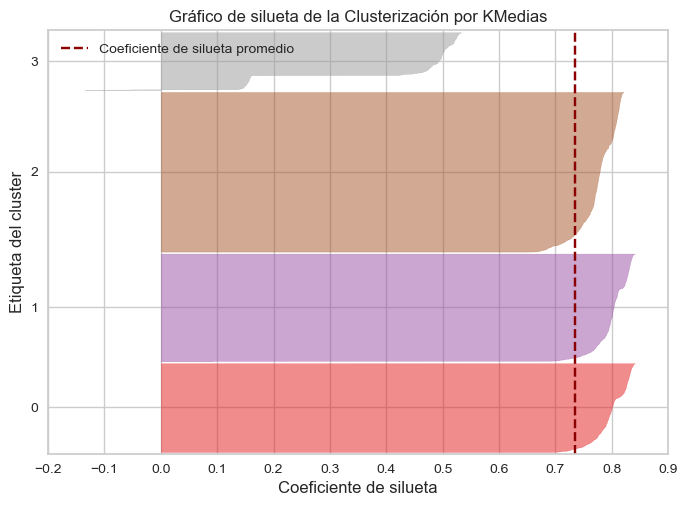

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.46 y el índice CH es 1322
Para 3 clusters, el coeficiente de silueta medio es 0.65 y el índice CH es 2772
Para 4 clusters, el coeficiente de silueta medio es 0.73 y el índice CH es 4596
Para 5 clusters, el coeficiente de silueta medio es 0.78 y el índice CH es 8136
Para 6 clusters, el coeficiente de silueta medio es 0.58 y el índice CH es 7110
Para 7 clusters, el coeficiente de silueta medio es 0.44 y el índice CH es 6315
Para 8 clusters, el coeficiente de silueta medio es 0.57 y el índice CH es 5732
Para 9 clusters, el coeficiente de silueta medio es 0.32 y el índice CH es 5524
Para 10 clusters, el coeficiente de silueta medio es 0.34 y el índice CH es 5108
Silhouette: 0.7787240219760696:.2 / Clusters: 5
Coeficiente de silueta promedio: 0.78
CH Score: 8136
Iteration 3 : Word2Vec, One-hot

Iteration 4


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

EMBEDDED EDUCATION DONE
Index(['Year_Birth', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts',
       ...
       'Education_290', 'Education_291', 'Education_292', 'Education_293',
       'Education_294', 'Education_295', 'Education_296', 'Education_297',
       'Education_298', 'Education_299'],
      dtype='object', length=325)


array([0.62445651, 0.30594783, 0.04451513])

Varianza explicada en los tres primeros componentes: 0.97
Con 8 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 3, Inertia: 6540.59
Coeficiente de silueta promedio: 86.7%
CH Score: 14508


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=3, random_state=2))

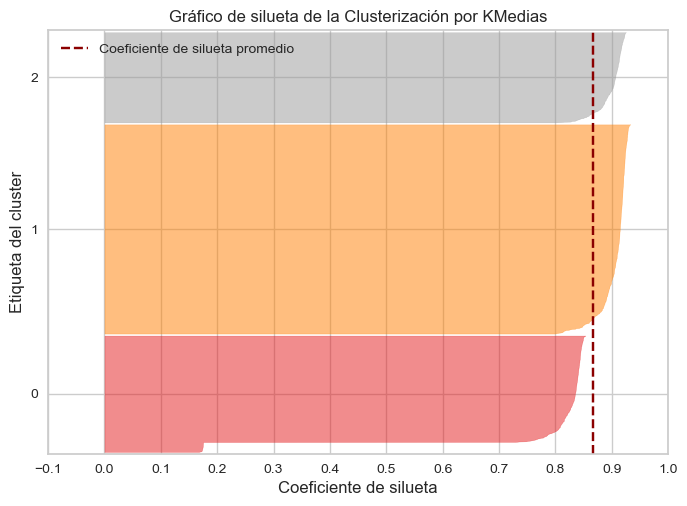

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.69 y el índice CH es 3689
Para 3 clusters, el coeficiente de silueta medio es 0.87 y el índice CH es 14508
Para 4 clusters, el coeficiente de silueta medio es 0.9 y el índice CH es 47154
Para 5 clusters, el coeficiente de silueta medio es 0.6 y el índice CH es 41479
Para 6 clusters, el coeficiente de silueta medio es 0.6 y el índice CH es 36671
Para 7 clusters, el coeficiente de silueta medio es 0.49 y el índice CH es 33431
Para 8 clusters, el coeficiente de silueta medio es 0.35 y el índice CH es 31812
Para 9 clusters, el coeficiente de silueta medio es 0.34 y el índice CH es 29634
Para 10 clusters, el coeficiente de silueta medio es 0.36 y el índice CH es 28722
Silhouette: 0.9040161310284404:.2 / Clusters: 4
Coeficiente de silueta promedio: 0.9
CH Score: 47154
Iteration 4 : Ordinal, Word2Vec

Iteration 5


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.21570418, 0.12418875, 0.10060048])

Varianza explicada en los tres primeros componentes: 0.44
Con 23 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 5, Inertia: 1645.07
Coeficiente de silueta promedio: 13.7%
CH Score: 308


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=5, random_state=2))

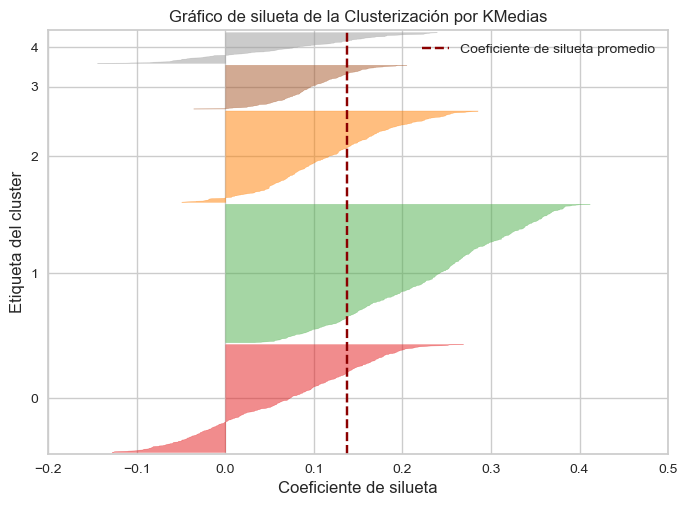

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 412
Para 3 clusters, el coeficiente de silueta medio es 0.17 y el índice CH es 385
Para 4 clusters, el coeficiente de silueta medio es 0.18 y el índice CH es 325
Para 5 clusters, el coeficiente de silueta medio es 0.14 y el índice CH es 308
Para 6 clusters, el coeficiente de silueta medio es 0.13 y el índice CH es 279
Para 7 clusters, el coeficiente de silueta medio es 0.13 y el índice CH es 262
Para 8 clusters, el coeficiente de silueta medio es 0.13 y el índice CH es 246
Para 9 clusters, el coeficiente de silueta medio es 0.13 y el índice CH es 238
Para 10 clusters, el coeficiente de silueta medio es 0.14 y el índice CH es 224
Silhouette: 0.18939510368170398:.2 / Clusters: 2
Coeficiente de silueta promedio: 0.19
CH Score: 412
Iteration 5 : Ordinal, Ordinal

Iteration 6


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Marital_Status, dtype: float64

ONE HOT ENCODING FOR EDUCATION IS DONE


Index(['Year_Birth', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.20235923, 0.14563288, 0.10928672])

Varianza explicada en los tres primeros componentes: 0.46
Con 25 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 5, Inertia: 2165.85
Coeficiente de silueta promedio: 23.9%
CH Score: 421


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=5, random_state=2))

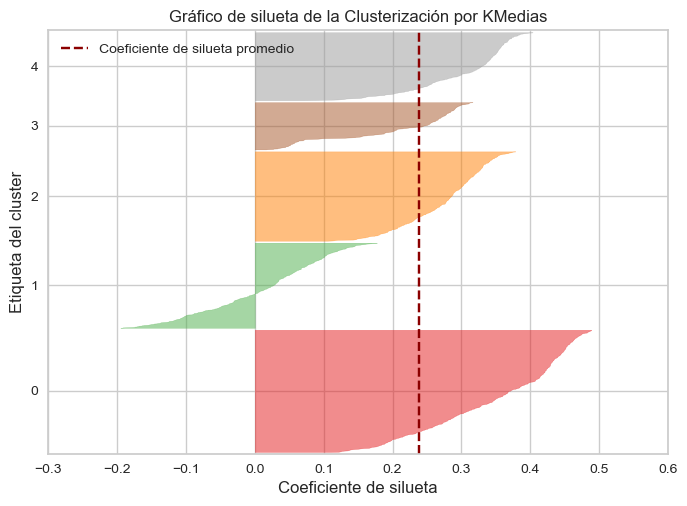

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.22 y el índice CH es 554
Para 3 clusters, el coeficiente de silueta medio es 0.27 y el índice CH es 493
Para 4 clusters, el coeficiente de silueta medio es 0.3 y el índice CH es 447
Para 5 clusters, el coeficiente de silueta medio es 0.24 y el índice CH es 421
Para 6 clusters, el coeficiente de silueta medio es 0.23 y el índice CH es 398
Para 7 clusters, el coeficiente de silueta medio es 0.23 y el índice CH es 358
Para 8 clusters, el coeficiente de silueta medio es 0.23 y el índice CH es 337
Para 9 clusters, el coeficiente de silueta medio es 0.22 y el índice CH es 314
Para 10 clusters, el coeficiente de silueta medio es 0.2 y el índice CH es 291
Silhouette: 0.30447009272941983:.2 / Clusters: 4
Coeficiente de silueta promedio: 0.3
CH Score: 447
Iteration 6 : Ordinal, One-hot

Iteration 7
ONE HOT ENCODING FOR MARITAL STATUS IS DONE
EMBEDDED EDUCATION DONE
Index(['Year_Birth', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_S

array([0.6139842 , 0.30082252, 0.04378199])

Varianza explicada en los tres primeros componentes: 0.96
Con 11 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 3, Inertia: 8069.87
Coeficiente de silueta promedio: 82.2%
CH Score: 11759


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=3, random_state=2))

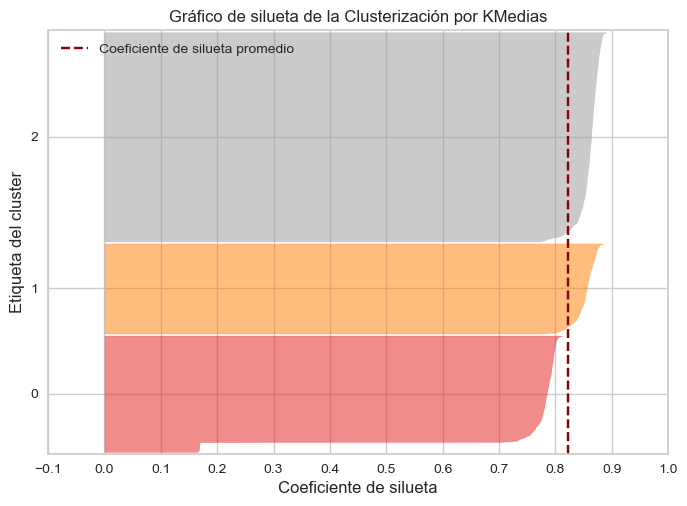

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.65 y el índice CH es 3532
Para 3 clusters, el coeficiente de silueta medio es 0.82 y el índice CH es 11759
Para 4 clusters, el coeficiente de silueta medio es 0.86 y el índice CH es 22729
Para 5 clusters, el coeficiente de silueta medio es 0.55 y el índice CH es 19459
Para 6 clusters, el coeficiente de silueta medio es 0.6 y el índice CH es 17261
Para 7 clusters, el coeficiente de silueta medio es 0.45 y el índice CH es 15573
Para 8 clusters, el coeficiente de silueta medio es 0.47 y el índice CH es 14446
Para 9 clusters, el coeficiente de silueta medio es 0.34 y el índice CH es 13696
Para 10 clusters, el coeficiente de silueta medio es 0.35 y el índice CH es 12905
Silhouette: 0.8556798767635194:.2 / Clusters: 4
Coeficiente de silueta promedio: 0.86
CH Score: 22729
Iteration 7 : One-hot, Word2Vec

Iteration 8
ONE HOT ENCODING FOR MARITAL STATUS IS DONE


0    1.0
1    1.0
2    1.0
3    1.0
4    4.0
Name: Education, dtype: float64

Index(['Year_Birth', 'Education', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_Status_3', 'Marital_Status_4', 'Marital_Status_5',
       'Marital_Status_6', 'Marital_Status_7', 'Marital_Status_8', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.17647637, 0.1361788 , 0.12616576])

Varianza explicada en los tres primeros componentes: 0.44
Con 25 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 4, Inertia: 2593.29
Coeficiente de silueta promedio: 28.9%
CH Score: 435


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=4, random_state=2))

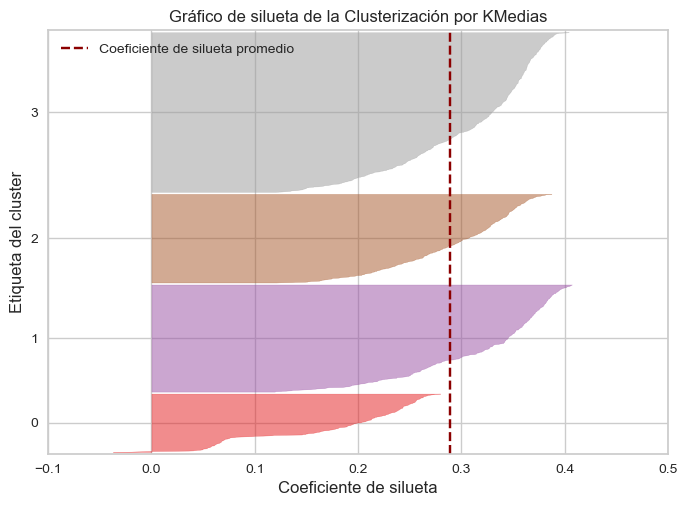

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.18 y el índice CH es 467
Para 3 clusters, el coeficiente de silueta medio es 0.25 y el índice CH es 464
Para 4 clusters, el coeficiente de silueta medio es 0.29 y el índice CH es 435
Para 5 clusters, el coeficiente de silueta medio es 0.29 y el índice CH es 399
Para 6 clusters, el coeficiente de silueta medio es 0.22 y el índice CH es 359
Para 7 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 324
Para 8 clusters, el coeficiente de silueta medio es 0.21 y el índice CH es 308
Para 9 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 289
Para 10 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 273
Silhouette: 0.29393285563175786:.2 / Clusters: 5
Coeficiente de silueta promedio: 0.29
CH Score: 399
Iteration 8 : One-hot, Ordinal

Iteration 9
ONE HOT ENCODING FOR MARITAL STATUS IS DONE
ONE HOT ENCODING FOR EDUCATION IS DONE


Index(['Year_Birth', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Marital_Status_1', 'Marital_Status_2',
       'Marital_Status_3', 'Marital_Status_4', 'Marital_Status_5',
       'Marital_Status_6', 'Marital_Status_7', 'Marital_Status_8', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer_rel'],
      dtype='object')

array([0.14353489, 0.13537384, 0.10513251])

Varianza explicada en los tres primeros componentes: 0.38
Con 28 componentes representamos el 0.99% de la varianza explicada por los componentes.
Inflection point: 5, Inertia: 3547.19
Coeficiente de silueta promedio: 18.8%
CH Score: 286


CustomSilhouetteVisualizer(ax=<AxesSubplot:>,
                           estimator=KMeans(n_clusters=5, random_state=2))

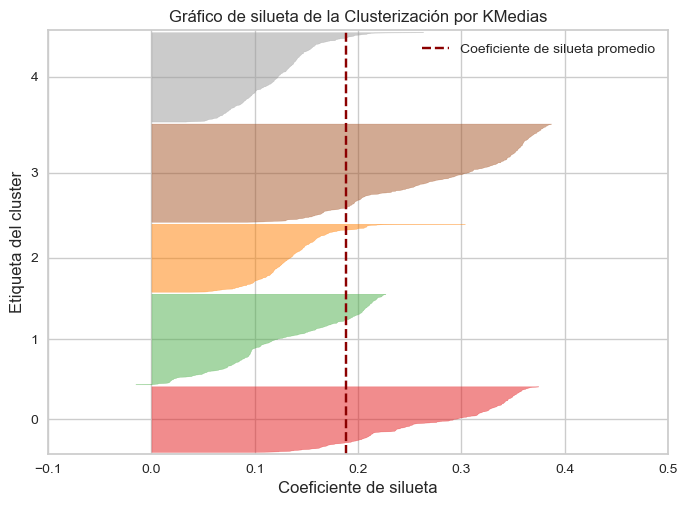

<AxesSubplot:title={'center':'Gráfico de silueta de la Clusterización por KMedias'}, xlabel='Coeficiente de silueta', ylabel='Etiqueta del cluster'>

Para 2 clusters, el coeficiente de silueta medio es 0.15 y el índice CH es 366
Para 3 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 310
Para 4 clusters, el coeficiente de silueta medio es 0.18 y el índice CH es 295
Para 5 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 286
Para 6 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 268
Para 7 clusters, el coeficiente de silueta medio es 0.19 y el índice CH es 253
Para 8 clusters, el coeficiente de silueta medio es 0.2 y el índice CH es 242
Para 9 clusters, el coeficiente de silueta medio es 0.22 y el índice CH es 239
Para 10 clusters, el coeficiente de silueta medio es 0.25 y el índice CH es 230
Silhouette: 0.202737096403894:.2 / Clusters: 8
Coeficiente de silueta promedio: 0.2
CH Score: 242
Iteration 9 : One-hot, One-hot



In [22]:
# Define embedding methods for marital status and education
encoding_marital = ['Word2Vec', 'Ordinal', 'One-hot']
encoding_education = ['Word2Vec', 'Ordinal', 'One-hot']

# # # To plot silhouette versus K:
# x= 0.6
# y= 0.95

n_clusters = []
score = []
iteracion = []
marital_enc = []
educ_enc = []

# Iterate over all combinations of embedding methods
index= 0
for marital_embedding, education_embedding in itertools.product(encoding_marital, encoding_education):
    marital_status_encoding = marital_embedding
    education_encoding= education_embedding
    data= clean_data.copy()
    
    print(f'Iteration {index+1}')
    if marital_status_encoding== 'One-hot':
        if 'Marital_Status' in data.columns:
            ohe= OneHotEncoder(cols=['Marital_Status'])
            data= ohe.fit_transform(data)
            print('ONE HOT ENCODING FOR MARITAL STATUS IS DONE') 
        else:
            print('process a was made in a previous iteration')
            
    elif marital_status_encoding== 'Ordinal':
        marital_cat= list(data['Marital_Status'].unique())
        ord_enc= OrdinalEncoder(categories=[marital_cat])
        ord_edu= pd.DataFrame(ord_enc.fit_transform(data[['Marital_Status']]))
        data['Marital_Status']= ord_edu
        data.columns
        data.loc[:, 'Marital_Status'].head()
            
    elif marital_status_encoding== 'Word2Vec':
        marital_status_vectors = {'Widow': dataset['Widow'],
                                  'Single': dataset['Single'],
                                  'Together': dataset['Together'],
                                  'Married': dataset['Married'],
                                  'Divorced': dataset['Divorced'],
                                  'Alone': dataset['Alone'],
                                  'YOLO': dataset['YOLO'],
                                  'Absurd': dataset['Absurd']
}
        for marital_status, vector in marital_status_vectors.items():
            # Create column names based on marital status
            column_names = [f'Marital_Status_{i}' for i in range(len(vector))]
            # Mask for rows where marital status matches
            mask = data['Marital_Status'] == marital_status
            # Assign values to corresponding columns
            data.loc[mask, column_names] = vector.tolist()
        data.drop('Marital_Status', axis=1, inplace= True)

        print('EMBEDDED MARITAL STATUS DONE')
        print(data.columns)
        
        
    if education_encoding == 'One-hot':
        if 'Education' in data.columns:
            ohe= OneHotEncoder(cols=['Education'])
            data= ohe.fit_transform(data)
            print('ONE HOT ENCODING FOR EDUCATION IS DONE')
            data.columns
#         else:
#             print('process b was made in a previous iteration')
            
    elif education_embedding== 'Ordinal':
        educ_cat= ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
        ord_enc= OrdinalEncoder(categories=[educ_cat])
        ord_edu= pd.DataFrame(ord_enc.fit_transform(data[['Education']]))
        data['Education']= ord_edu
        data.loc[:, 'Education'].head()
        data.columns
        
    elif education_encoding== 'Word2Vec':
#         Assuming 2n cycle and Master means the same thing. We can combine these two categories.
        data['Education'] = data['Education'].replace('2n Cycle', 'Master')
        education_vectors = {'Basic': dataset['Basic'],
                             'Master': dataset['Master'],
                             'PhD': dataset['PhD'],
                             'Graduation': dataset['Graduation'],
}
        # Iterate over each marital status and assign vectors to corresponding columns
        for education, vector in education_vectors.items():
            # Create column names based on marital status
            column_names = [f'Education_{i}' for i in range(len(vector))]
            mask = data['Education'] == education
            # Assign values to corresponding columns
            data.loc[mask, column_names] = vector.tolist()
        data.drop('Education', axis=1, inplace= True)
        print('EMBEDDED EDUCATION DONE')
        print(data.columns)
    

    # Scaling features:
    scaler= MinMaxScaler()
    num =[var for var in data.columns if data[var].dtypes!='object' and 'Accepted' not in var and 'Complain' not in var and 'Response' not in var]
#     num
    data[num]= scaler.fit_transform(data[num])
    
    pca = PCA(n_components= 3)
    data_pca = pca.fit_transform(data)
    pca.explained_variance_ratio_

    print('Varianza explicada en los tres primeros componentes:',
          "%.2f"%(pca.explained_variance_ratio_.sum()))
    
    Explained_Variance = pca.explained_variance_ratio_.sum()
    
    for i in range(2, int(data.shape[1])):
        pca = PCA(n_components= i)
        data_pca = pca.fit_transform(data)
        if pca.explained_variance_ratio_.sum()>= 0.99:
            break
    
    l_components= i
    percentage= "%.2f"%(pca.explained_variance_ratio_.sum())
    print(f'Con {i} componentes representamos el {percentage}% de la varianza explicada por los componentes.')

    # Creating a new dataframe with the dataset turned into l PCA components:
    data_pca= pd.DataFrame(data_pca)
#     data_pca.head()
    
    # Defining the optimal number of clusters (K) by the elbow method:
    inertia=[]
    kmax= 8
    ks = list(range(2, kmax + 1))
    
    for i in range(2, kmax+1):
        clustering= KMeans(n_clusters=i, random_state=2).fit(data_pca)
        inertia.append(clustering.inertia_)
        
#     ax.plot(ks, inertia, label= index, color=colors[index % len(colors)])
#     plt.text(x, y, f'Embedding frame{index}: {marital_embedding}, {education_embedding}', 
#              horizontalalignment='left', verticalalignment='top', 
#              transform= ax.transAxes, fontsize=6, bbox= dict(facecolor='white', alpha=0.5))
#     ax.legend(title='Iteration', fontsize='small', title_fontsize='small')

    # Determining the point of inflection of the curve of inertia versus number of clusters:
    kneedle_kmeans= kneed.KneeLocator(y= inertia, x= ks, S= 1.0, curve= 'convex',
                                      direction= 'decreasing')
    inflection_point_kmeans= [kneedle_kmeans.knee, "%.2f"%kneedle_kmeans.knee_y]
    print(f'Inflection point: {inflection_point_kmeans[0]}, Inertia: {inflection_point_kmeans[1]}')
#     kneedle_kmeans.plot_knee()
    
    # Creating the model with inflection_point_kmeans (optimal K found by the elbow method):
    kmeans= KMeans(n_clusters= int(inflection_point_kmeans[0]), random_state=2).fit(data_pca)
    # Inserting the generated labels into a new column in the dataset:
#     data_pca['kmeans_labels']= kmeans.labels_
    
    # Mean silhouette score:
    silhouette_avg_kmeans= silhouette_score(data_pca, kmeans.labels_)
    print(f'Coeficiente de silueta promedio: {silhouette_avg_kmeans:.1%}')
    Silhouette = silhouette_avg_kmeans
    # Calinski Harabasz (CH) score:
    CH_kmeans= calinski_harabasz_score(data_pca, kmeans.labels_)
    print(f'CH Score: {round(CH_kmeans)}')
    Calinski_Harabasz = round(CH_kmeans)
    
    from yellowbrick.cluster import SilhouetteVisualizer

#     Define a custom SilhouetteVisualizer class with a fixed x-label
    class CustomSilhouetteVisualizer(SilhouetteVisualizer):

        def draw(self, labels):
            ax= super().draw(labels)
            ax.axvline(x= self.silhouette_score_, color='darkred',
                            linestyle="dashed", label= "Coeficiente de silueta promedio")
            for line in ax.lines:
                if line.get_label() == "Average Silhouette Score":
                    line.remove()
                    break 

        def finalize(self):
            super().finalize()  # Call the superclass's finalize method
            # Override the x-label and y-label
            self.ax.set_xlabel("Coeficiente de silueta", fontsize=12)
            self.ax.set_ylabel("Etiqueta del cluster", fontsize=12)
            self.set_title('Gráfico de silueta de la Clusterización por KMedias')           
        
    visualizer = CustomSilhouetteVisualizer(kmeans, ax= None, colors= None,
                                            is_fitted= "auto")
    visualizer.fit(data_pca)
    visualizer.show()

    # Iterating to check the mean silhouette score and the CH score for other values of K:
    kmax= 10 # Valor máximo de clusters deseado
    for i in range(2, kmax+1):
        # Creating the model:
        kmeans= KMeans(n_clusters=i, random_state=2).fit(data_pca)
        # Mean silhouette score:
        silhouette_avg_kmeans= silhouette_score(X= data_pca, labels= kmeans.labels_)
        # CH score:
        CH_kmeans= calinski_harabasz_score(X=data_pca, labels= kmeans.labels_)
        print(f'Para {i} clusters, el coeficiente de silueta medio es {silhouette_avg_kmeans:.2} y el índice CH es {round(CH_kmeans)}')
        
    # Determining the optimal number of clusters (K) using the graph of silhouette score versus K:
    sil= []
    kmax= 8
    ks = list(range(2, kmax + 1))

    for k in range(2, kmax+1):
        clustering= KMeans(n_clusters= k, random_state=2).fit(data_pca)
        labels= clustering.labels_
        sil.append(silhouette_score(data_pca, labels))
    
    # For plotting the graph of silhouette score versus K:
    n_clusters.append(ks)
    score.append(sil)
    iteracion.append(index + 1)
    marital_enc.append(marital_embedding)
    educ_enc.append(education_embedding)
    
    n_max= max(sil)
    index_max = sil.index(n_max)
    print(f'Silhouette: {n_max}:.2 / Clusters: {ks[index_max]}')
    Clusters_Silhouette= ks[index_max]

    # Creating the model with n_clusters[0][index_max] (optimal K found by the silhouette score)
    kmeans_sil= KMeans(n_clusters= ks[index_max], random_state=2).fit(data_pca)
    
    # Mean silhouette score:
    silhouette_avg_kmeans_sil = silhouette_score(data_pca, labels= kmeans_sil.labels_)
    print(f'Coeficiente de silueta promedio: {silhouette_avg_kmeans_sil:.2}')
    Silhouette_Silhouette = silhouette_avg_kmeans_sil

    # Calinski Harabasz (CH) score:
    CH_kmeans_Silhouette = calinski_harabasz_score(X=data_pca, labels= kmeans_sil.labels_)
    print('CH Score:', round(CH_kmeans_Silhouette))
    Calinski_Harabasz_Silhouette= round(CH_kmeans_Silhouette)
   
    results = [
        {'Experiment': index+1,
         'Marital_Status_Encoding': marital_status_encoding,
         'Education_Encoding': education_encoding,
         'Dimensions': data.shape[1],
         'Components': l_components,
         'Explained Variance': Explained_Variance,
         'Clusters': int(inflection_point_kmeans[0]),
         'Calinski-Harabasz': Calinski_Harabasz,
         'Silhouette': Silhouette,
         'Clusters_Silhouette': Clusters_Silhouette,
         'Calinski_Harabasz_Silhouette': Calinski_Harabasz_Silhouette,
         'Silhouette_Silhouette': Silhouette_Silhouette
              }
     ]

    # Define the header of the CSV file
    keys= [key for key in results[0].keys()]

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)

    # Save the DataFrame to a CSV file
    if os.path.exists('experiment_results.csv'):
        results_df = pd.read_csv('experiment_results.csv')
        new_results = results
    # Append the new results to the DataFrame
        results_df = results_df.append(new_results, ignore_index=True)
    # Save the updated DataFrame to the CSV file
        results_df.to_csv('experiment_results.csv', index=False)
    else:
    # If the CSV file doesn't exist, initialize an empty DataFrame
        results_df.to_csv('experiment_results.csv', index=False)
    
    print(f'Iteration {index+1} : {marital_status_encoding}, {education_encoding}')
    index += 1
    print()

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

Text(0.5, 1.0, 'Coeficiente de silueta por número de clusters')

Text(0.5, 0, 'Clusters')

Text(0, 0.5, 'Silueta')

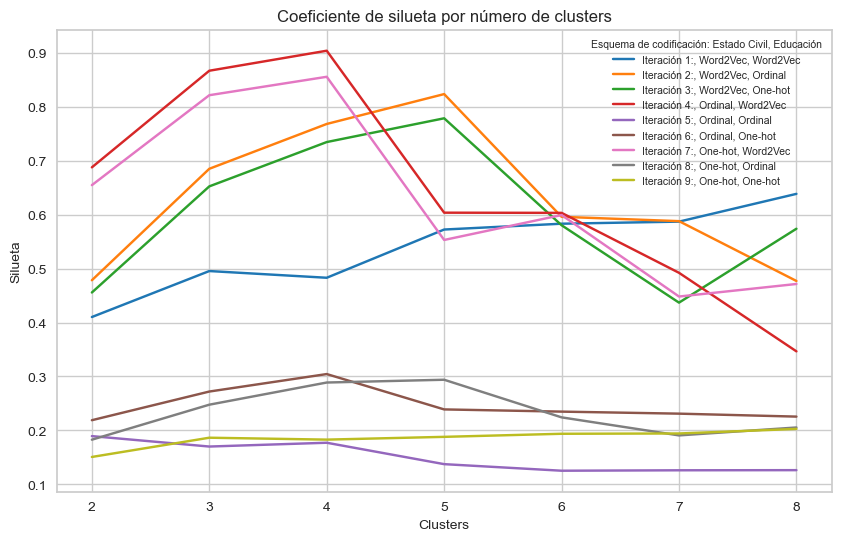

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.tab10.colors

for i in list(range(9)):
    ks = n_clusters[i]
    sil = score[i]
    label = f'Iteración {iteracion[i]}:, {marital_enc[i]}, {educ_enc[i]}'
    ax.plot(ks, sil, label = f'Iteración {iteracion[i]}:, {marital_enc[i]}, {educ_enc[i]}',
            color= colors[i % len(colors)])

    plt.rc('font', size= 9)
    plt.title("Coeficiente de silueta por número de clusters")
    ax.legend(title= 'Esquema de codificación: Estado Civil, Educación', fontsize= 'small', title_fontsize= 'small')
    plt.xlabel('Clusters', fontsize= 10)
    plt.ylabel('Silueta', fontsize= 10)